## Importer les librairies nécessaires

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

## Références bibliographiques


* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.



## Produire les observations

Cf. Hamon, p.4, tableau 1.1

Afin de reproduire ce tableau, on utilise des fonctions produisant des valeur aléatoires.

* On produit d'abord les valeurs aléatoires (remplaçant les observations) pour chaque variable
* On les regroupe ensuite dans un dataframe Pandas

In [20]:
### Créer une liste d'identifiants
id_list = []
[id_list.append(x) for x in range(1,901)] #

print(id_list[-5:])
len(id_list)

[896, 897, 898, 899, 900]


900

In [21]:
### Créer une liste d'âges
age_list = []
for x in range(1,901): # 101
    age_list.append(random.randint(18,90))

print(age_list[:5])
len(age_list)

[87, 31, 79, 36, 75]


900

In [22]:
### Créer une liste de nombre de personne dans un foyer
nfoyer_list = []
for x in range(1,901):  # 101
    nfoyer_list.append(random.randint(1,7))

print(nfoyer_list[:5])
len(nfoyer_list)

[7, 4, 5, 3, 4]


900

In [23]:
### Créer une liste de fréquences de lecture des journaux
lecture_list = []
for x in range(1,901):  # 101
    lecture_list.append(random.choice(['tous les jours', 'de temps en temps', 'très rarement', 'deux-trois fois par semaine', 'le week-end']))

print(lecture_list[:5])
len(lecture_list)

['deux-trois fois par semaine', 'de temps en temps', 'deux-trois fois par semaine', 'le week-end', 'deux-trois fois par semaine']


900

In [24]:
### Créer une liste d'orientations politiques
politique_list = []
for x in range(1,901):  # 101
    politique_list.append(random.choice(['gauche', 'écologiste', 'droite', 'centre', 'populiste']))

print(politique_list[:5])
len(politique_list)

['populiste', 'gauche', 'populiste', 'écologiste', 'gauche']


900

### Création du dataframe

In [25]:
#  https://www.statology.org/add-column-pandas-dataframe/

observations = pd.DataFrame({'id' : id_list, 'age' : age_list, 'n_foyer' : nfoyer_list, 
                             'lecture_journal' : lecture_list, 'parti' : politique_list})

In [26]:
print(len(observations))
observations.head()

900


,id,age,n_foyer,lecture_journal,parti
0,1,87,7,deux-trois fois par semaine,populiste
1,2,31,4,de temps en temps,gauche
2,3,79,5,deux-trois fois par semaine,populiste
3,4,36,3,le week-end,écologiste
4,5,75,4,deux-trois fois par semaine,gauche


In [27]:
observations.set_index('id', inplace=True)
observations.head()

,age,n_foyer,lecture_journal,parti
id,,,,
1,87,7,deux-trois fois par semaine,populiste
2,31,4,de temps en temps,gauche
3,79,5,deux-trois fois par semaine,populiste
4,36,3,le week-end,écologiste
5,75,4,deux-trois fois par semaine,gauche


In [28]:
### Ecrire le fichier sur le disque afin de le corriger manuellement

path = 'data/observations_900.csv'
observations.to_csv(path)

In [3]:
### Lire le fichier corrigé manuellement

path = 'data/observations_mod.csv'
observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,n_foyer,lecture_journal,parti
id,,,,
1,44,3,de temps en temps,droite
2,45,4,tous les jours,droite
3,54,3,de temps en temps,droite
4,86,6,tous les jours,écologiste
5,77,4,tous les jours,gauche


## Analyser les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [29]:
# obs = observations_mod
obs = observations # 900

In [30]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = True)
sgb_lecture_journal

lecture_journal
le week-end                    162
tous les jours                 172
deux-trois fois par semaine    179
très rarement                  179
de temps en temps              208
dtype: int64

In [31]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
centre        161
gauche        169
populiste     187
écologiste    190
droite        193
dtype: int64

In [32]:
df_partis = pd.DataFrame(sgb_parti)
df_partis.reset_index(inplace=True)
df_partis

,parti,0
0,centre,161
1,gauche,169
2,populiste,187
3,écologiste,190
4,droite,193


In [33]:
df_partis.columns = ['parti','effectif']
df_partis['code_parti'] = [4,2,5,3,1]
# df_partis.reset_index('parti').set_index('code_parti')
df_partis

,parti,effectif,code_parti
0,centre,161,4
1,gauche,169,2
2,populiste,187,5
3,écologiste,190,3
4,droite,193,1


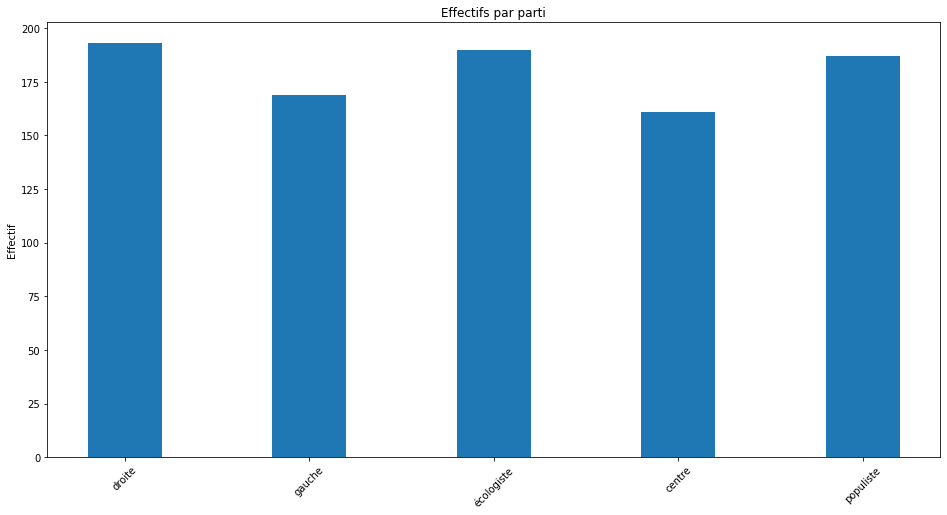

In [53]:
# Distribution par parti

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]



p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [35]:
sgb_lecture_journal

lecture_journal
le week-end                    162
tous les jours                 172
deux-trois fois par semaine    179
très rarement                  179
de temps en temps              208
dtype: int64

In [36]:
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal

,lecture_journal,0
0,le week-end,162
1,tous les jours,172
2,deux-trois fois par semaine,179
3,très rarement,179
4,de temps en temps,208


In [37]:
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [2,5,3,1,4]
df_lecture_journal

,lecture,effectif,code_lecture
0,le week-end,162,2
1,tous les jours,172,5
2,deux-trois fois par semaine,179,3
3,très rarement,179,1
4,de temps en temps,208,4


In [38]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
df_lecture_journal

,lecture,effectif,code_lecture
3,très rarement,179,1
0,le week-end,162,2
2,deux-trois fois par semaine,179,3
4,de temps en temps,208,4
1,tous les jours,172,5


In [39]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
3,très rarement,179,1,179
0,le week-end,162,2,341
2,deux-trois fois par semaine,179,3,520
4,de temps en temps,208,4,728
1,tous les jours,172,5,900


In [41]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
3,très rarement,179,1,179,19.89
0,le week-end,162,2,341,18.00
2,deux-trois fois par semaine,179,3,520,19.89
4,de temps en temps,208,4,728,23.11
1,tous les jours,172,5,900,19.11


In [42]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
3,très rarement,179,1,179,19.89,19.89
0,le week-end,162,2,341,18.00,37.89
2,deux-trois fois par semaine,179,3,520,19.89,57.78
4,de temps en temps,208,4,728,23.11,80.89
1,tous les jours,172,5,900,19.11,100.00


In [43]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
3,très rarement,179,1,179,19.89,19.89
0,le week-end,162,2,341,18.00,37.89
2,deux-trois fois par semaine,179,3,520,19.89,57.78
4,de temps en temps,208,4,728,23.11,80.89
1,tous les jours,172,5,900,19.11,100.00


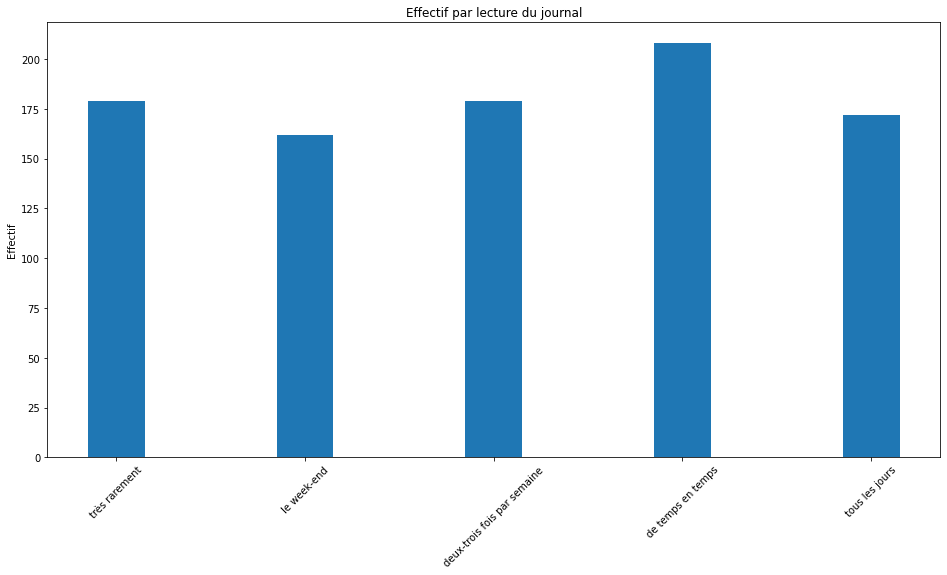

In [50]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


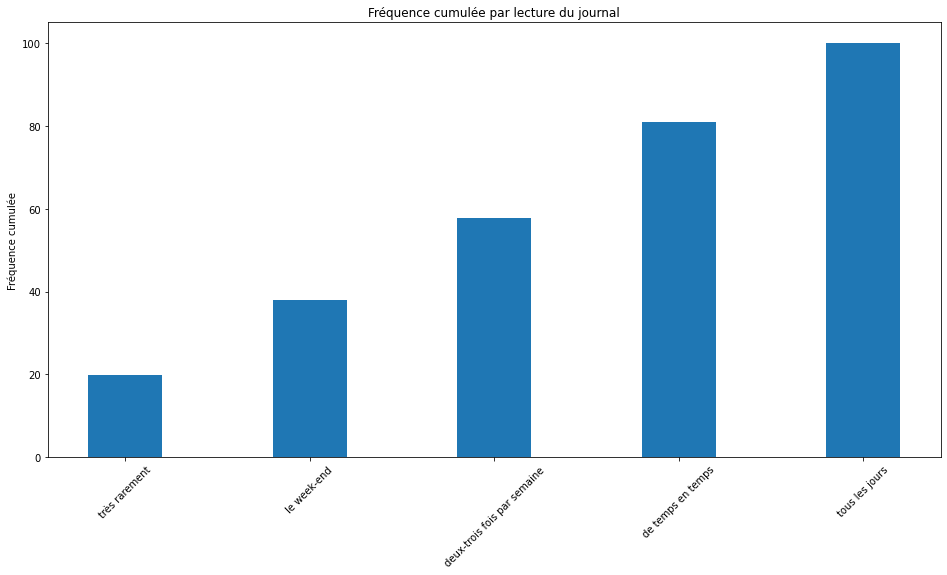

In [52]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Paramètre

In [5]:
obs['age'].describe()

count    100.000000
mean      51.740000
std       21.675113
min       18.000000
25%       32.000000
50%       52.000000
75%       73.250000
max       90.000000
Name: age, dtype: float64

<AxesSubplot:>

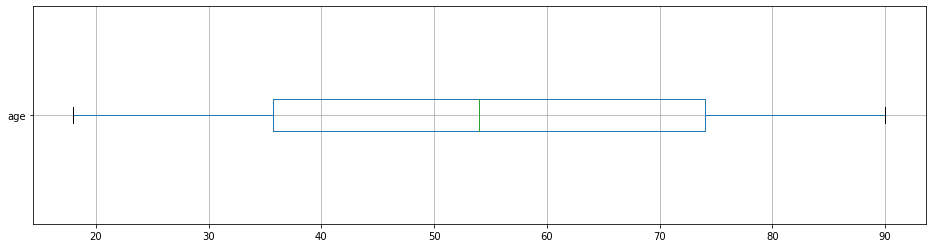

In [48]:
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

In [6]:
obs['n_foyer'].describe()

count    100.000000
mean       3.670000
std        1.826046
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: n_foyer, dtype: float64